# Loading Data from Sklearn (Breast Cancer)

In [29]:
import numpy as np
import sklearn.datasets
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
print(X.shape,Y.shape)

(569, 30) (569,)


In [30]:
import pandas as pd

In [31]:
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)

In [32]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
data['class'] = breast_cancer.target

In [34]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [36]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [37]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [38]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# TestTrain Split

## Simple Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = data.drop('class',axis=1)
y = data['class']

In [41]:
type(X)

pandas.core.frame.DataFrame

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1);

In [43]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [44]:
print(y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.5964912280701754 0.630859375


## Data Ratio is different lets stratify data.

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,stratify=y);

In [46]:
print(y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.631578947368421 0.626953125


## Fixing the splits every time we run it

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=1)
print(y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.631578947368421 0.626953125


# Binarisation of input

In [48]:
import matplotlib.pyplot as plt


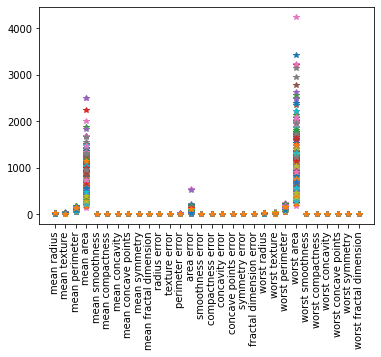

In [49]:

plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

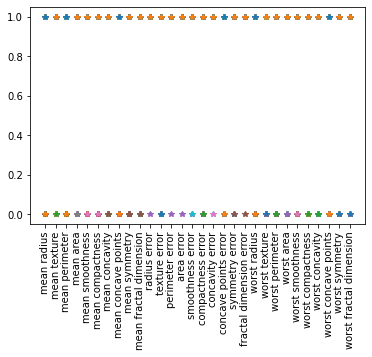

In [51]:
import matplotlib.pyplot as plt
#binarize with mean
X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[1,0])
X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

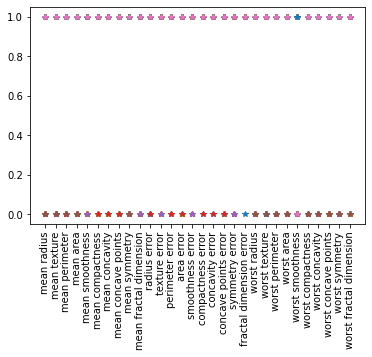

In [52]:
plt.plot(X_binarised_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [53]:
#converting them into numpy array
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

# MP Neuron Model

In [60]:
import numpy as np
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train = []
  accurate_rows = 0
  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y==y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [56]:
from sklearn.metrics import accuracy_score
b = 28
y_pred_test = []
for x in X_binarised_test:
  y_pred = (np.sum(x)>=b)
  y_pred_test.append(y_pred)
print(b, accuracy_score(y_pred_test,Y_test))

28 0.7894736842105263


# MP Neuron class

In [57]:
class MPNeuron:
 def __init__(self):
   self.b = None
 def model(self,x):
   return(sum(x)>=self.b)
 def predict(self,X):
   Y=[]
   for x in X:
     result = self.model(x)
     Y.append(result)
   return Y
 def fit(self,X,Y):
   accuracy = {}
   for b in range(X.shape[1]+1):
     self.b = b;
     y_pred = self.predict(X)
     accuracy[b]=accuracy_score(y_pred,Y)
   best_b = max(accuracy,key = accuracy.get)
   self.b = best_b

   print('Optimal value of b is', best_b)
   print('Highest Accuracy is',accuracy[best_b])

In [58]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,Y_train)


Optimal value of b is 28
Highest Accuracy is 0.849609375


In [59]:
y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(y_test_pred,Y_test)
print(accuracy_test)

0.7894736842105263
